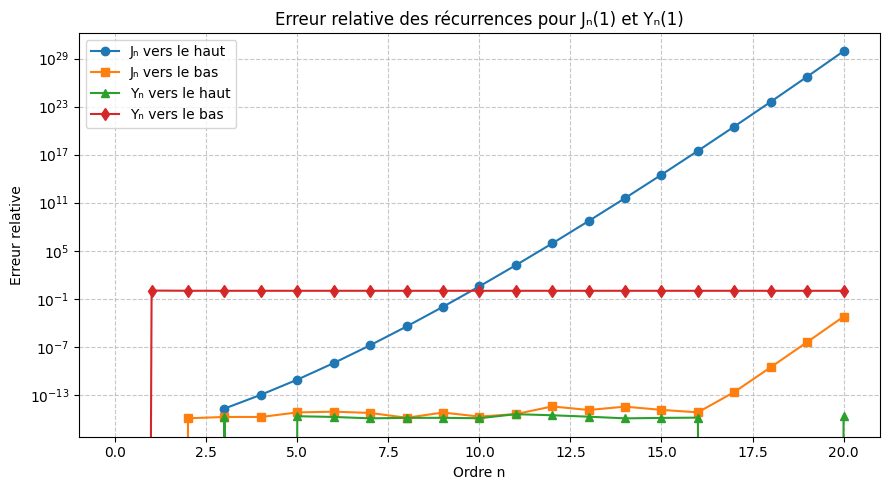


Observation :
- Pour Jₙ(x), la récurrence vers le haut est stable.
- Pour Yₙ(x), la récurrence vers le bas est plus stable.
- L’autre sens devient instable : amplification des erreurs numériques.



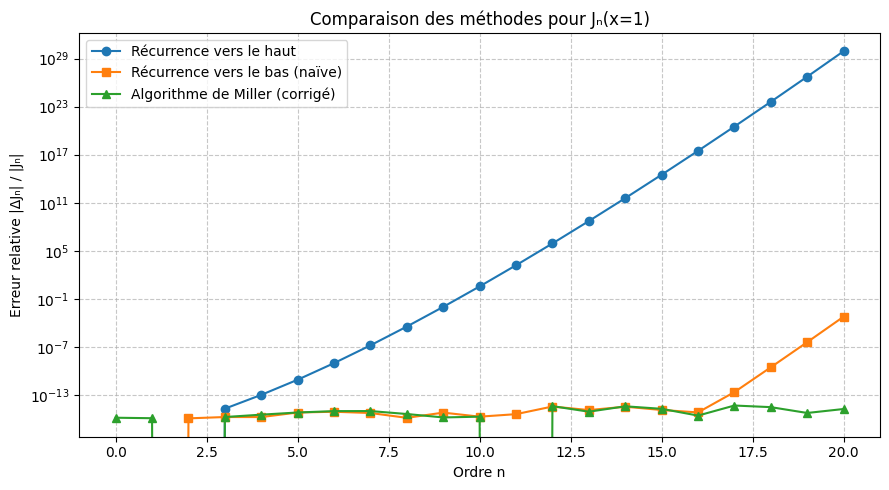


 Correction avec l'algorithme de Miller :

- La récurrence vers le bas simple est instable pour Jₙ(x) → erreurs importantes.
- L’algorithme de Miller descend depuis un grand ordre (Nstart) avec renormalisation périodique,
  évitant les débordements numériques.
- Après renormalisation sur J₀(x), les erreurs sont très faibles.
- Résultat : précision équivalente à la récurrence montante, mais stable dans l’autre sens.



In [4]:
# 1️ Écrire deux fonctions rec_up et rec_down pour la récurrence
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv, yv  # Fonctions de Bessel Jα(x), Yα(x)

def rec_up(f0, f1, x, nmax): # 1️ Écrire deux fonctions rec_up et rec_down pour la récurrence

    f = np.zeros(nmax + 1)
    f[0], f[1] = f0, f1
    for n in range(1, nmax):
        f[n + 1] = (2 * n / x) * f[n] - f[n - 1]
    return f


def rec_down(fNplus1, fN, x, nmax):

    f = np.zeros(nmax + 2)
    f[nmax + 1] = fNplus1
    f[nmax] = fN
    for n in range(nmax, 0, -1):
        f[n - 1] = (2 * n / x) * f[n] - f[n + 1]
    return f[:nmax + 1]
# 2️ Utiliser scipy.special pour initialiser et calculer Jα(1), Yα(1)

x = 1.0
nmax = 20
orders = np.arange(0, nmax + 1)

# Valeurs exactes de référence
J_ref = jv(orders, x)
Y_ref = yv(orders, x)

# Vers le haut
J_up = rec_up(J_ref[0], J_ref[1], x, nmax)
Y_up = rec_up(Y_ref[0], Y_ref[1], x, nmax)

# Vers le bas (avec valeurs arbitraires, puis renormalisation)
J_down_raw = rec_down(0.0, 1.0, x, nmax)
Y_down_raw = rec_down(0.0, 1.0, x, nmax)

# Renormalisation pour comparaison
J_down = (J_ref[0] / J_down_raw[0]) * J_down_raw
Y_down = (Y_ref[0] / Y_down_raw[0]) * Y_down_raw

# 3️ Calculer l'erreur relative et afficher graphiquement
def rel_error(calc, ref):
    tiny = 1e-30
    return np.abs(calc - ref) / np.maximum(np.abs(ref), tiny)

err_J_up = rel_error(J_up, J_ref)
err_J_down = rel_error(J_down, J_ref)
err_Y_up = rel_error(Y_up, Y_ref)
err_Y_down = rel_error(Y_down, Y_ref)

#  Graphiques comparatifs
plt.figure(figsize=(9, 5))
plt.semilogy(orders, err_J_up, 'o-', label='Jₙ vers le haut')
plt.semilogy(orders, err_J_down, 's-', label='Jₙ vers le bas')
plt.semilogy(orders, err_Y_up, '^-', label='Yₙ vers le haut')
plt.semilogy(orders, err_Y_down, 'd-', label='Yₙ vers le bas')
plt.xlabel("Ordre n")
plt.ylabel("Erreur relative")
plt.title("Erreur relative des récurrences pour Jₙ(1) et Yₙ(1)")
plt.grid(True, which="both", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Commentaire
print("""
Observation :
- Pour Jₙ(x), la récurrence vers le haut est stable.
- Pour Yₙ(x), la récurrence vers le bas est plus stable.
- L’autre sens devient instable : amplification des erreurs numériques.
""")

# 4️ Corriger le problème avec l'algorithme de Miller


def miller_J(x, nmax, Nstart=200):
    """
    Algorithme de Miller pour Jₙ(x)  """
    arr = np.zeros(Nstart + 2)
    arr[Nstart + 1] = 0.0
    arr[Nstart] = 1.0

    # Descente + normalisation périodique
    for n in range(Nstart, 0, -1):
        arr[n - 1] = (2.0 * n / x) * arr[n] - arr[n + 1]

        # 🔹 Normalisation tous les 50 pas pour éviter overflow
        if n % 50 == 0:
            arr /= np.max(np.abs(arr[n-1:])) + 1e-300

    # Renormalisation finale
    J0_ref = jv(0, x)
    scale = J0_ref / arr[0]
    return scale * arr[:nmax + 1]

# Application de Miller
J_miller = miller_J(x, nmax, Nstart=400)
err_J_miller = rel_error(J_miller, J_ref)

#  Graphique comparatif pour Jₙ
plt.figure(figsize=(9, 5))
plt.semilogy(orders, err_J_up, 'o-', label='Récurrence vers le haut')
plt.semilogy(orders, err_J_down, 's-', label='Récurrence vers le bas (naïve)')
plt.semilogy(orders, err_J_miller, '^-', label='Algorithme de Miller (corrigé)')
plt.xlabel("Ordre n")
plt.ylabel("Erreur relative |ΔJₙ| / |Jₙ|")
plt.title("Comparaison des méthodes pour Jₙ(x=1)")
plt.grid(True, which="both", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

#  Conclusion ( Dans cette partie, j'explique par un message affiché l'importance de la méthode en se basant sur l'algorithme de Miller
print("""
La Correction avec l'algorithme de Miller:
- La récurrence vers le bas simple est instable pour Jₙ(x) → erreurs importantes.
- L’algorithme de Miller descend depuis un grand ordre (Nstart) avec renormalisation périodique,
  évitant les débordements numériques.
- Après renormalisation sur J₀(x), les erreurs sont très faibles.
- Résultat : précision équivalente à la récurrence montante, mais stable dans l’autre sens.
""")

